In [0]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cvxopt as opt
import seaborn as sns
from cvxopt import blas, solvers

In [0]:
#acoes = ['ABEV3.SA', 'AZUL4.SA', 'B3SA3.SA', 'BBAS3.SA', 'BBDC3.SA', 'BBSE3.SA', 'BRAP4.SA', 'BRDT3.SA', 'BRFS3.SA',
#        'BRKM5.SA', 'BRML3.SA', 'BTOW3.SA', 'CCRO3.SA', 'CIEL3.SA', 'CMIG4.SA', 'CSAN3.SA', 'CSNA3.SA', 'CVCB3.SA',
#         'CYRE3.SA', 'ECOR3.SA', 'EGIE3.SA', 'ELET3.SA', 'ELET6.SA', 'EMBR3.SA', 'ENBR3.SA', 'EQTL3.SA', 'ESTC3.SA', 
#         'FLRY3.SA', 'GGBR4.SA', 'GOAU4.SA', 'GOLL4.SA', 'HYPE3.SA', 'IGTA3.SA', 'IRBR3.SA', 'ITSA4.SA', 'ITUB4.SA',
#         'JBSS3.SA', 'KLBN11.SA', 'KROT3.SA', 'LAME4.SA', 'LREN3.SA', 'MGLU3.SA', 'MRFG3.SA', 'MRVE3.SA', 'MULT3.SA',
#         'NATU3.SA', 'PCAR4.SA', 'PETR3.SA', 'PETR4.SA', 'QUAL3.SA', 'RADL3.SA', 'RAIL3.SA', 'RENT3.SA', 'SANB11.SA', 
#         'SBSP3.SA', 'SMLS3.SA', 'SUZB3.SA', 'TAEE11.SA', 'TIMP3.SA', 'UGPA3.SA', 'USIM5.SA', 'VALE3.SA', 'VIVT4.SA', 
#         'VVAR3.SA', 'WEGE3.SA', ]
acoes = ['ABEV3.SA', 'AZUL4.SA', 'B3SA3.SA', 'BBAS3.SA', 'BBDC3.SA', 'CIEL3.SA', 'GOLL4.SA', 'ITSA4.SA', 'ITUB4.SA',
         'JBSS3.SA', 'KROT3.SA', 'LAME4.SA', 'LREN3.SA', 'MGLU3.SA', 'MRFG3.SA', 'NATU3.SA', 'PETR3.SA', 'PETR4.SA',
         'SBSP3.SA', 'SMLS3.SA', 'SUZB3.SA', 'TIMP3.SA', 'USIM5.SA', 'VALE3.SA', 'VIVT4.SA', 'VVAR3.SA', 'WEGE3.SA']
data_inicial = '2019-01-01'
data_final = '2019-06-07'

dados_acoes_original = data.DataReader(acoes, 'yahoo', data_inicial, data_final)

In [7]:
dados_acoes_original

Attributes       High                        ...  Adj Close                    
Symbols      ABEV3.SA   AZUL4.SA   B3SA3.SA  ...   VIVT4.SA VVAR3.SA   WEGE3.SA
Date                                         ...                               
2019-01-02  16.299999  36.549999  27.910000  ...  44.957958     4.38  17.934200
2019-01-03  16.330000  37.599998  29.120001  ...  45.358177     4.31  18.343155
2019-01-04  16.690001  36.630001  29.260000  ...  45.262886     4.27  18.552622
2019-01-07  16.629999  36.470001  28.150000  ...  45.644051     4.24  18.263359
2019-01-08  16.700001  35.939999  28.200001  ...  45.748863     4.04  18.113741
2019-01-09  16.540001  35.209999  28.400000  ...  46.444489     4.01  18.313232
2019-01-10  17.000000  36.099998  28.379999  ...  46.168144     4.42  18.452875
2019-01-11  17.290001  37.200001  28.980000  ...  45.548756     4.51  18.642393
2019-01-14  17.660000  38.000000  29.750000  ...  45.939449     4.82  18.851856
2019-01-15  17.790001  37.750000  29.639999  ...  45.358177     4.98  18.482800
2019-01-16  17.840000  37.400002  29.950001  ...  44.643497     5.05  18.871805
2019-01-17  17.910000  37.400002  30.040001  ...  44.214699     4.93  18.752111
2019-01-18  18.000000  37.689999  30.670000  ...  44.872196     4.88  18.652367
2019-01-21  18.000000  36.340000  30.629999  ...  44.500568     4.80  18.772060
2019-01-22  18.080000  36.259998  30.549999  ...  43.986000     4.93  18.512722
2019-01-23  17.620001  36.000000  31.160000  ...  44.757851     5.16  18.722189
2019-01-24  17.299999  36.500000  31.650000  ...  45.520172     5.49  18.772060
2019-01-28  18.000000  36.139999  32.230000  ...  46.082382     5.35  19.071297
2019-01-29  18.200001  35.580002  32.599998  ...  45.558289     5.67  19.161066
2019-01-30  18.200001  36.090000  31.959999  ...  45.996620     5.77  19.370533
2019-01-31  18.100000  37.400002  31.809999  ...  46.396843     6.00  18.792009
2019-02-01  18.110001  37.320000  31.940001  ...  46.882824     5.96  19.579996
2019-02-04  18.480000  38.330002  32.330002  ...  46.882824     5.99  19.649820
2019-02-05  18.910000  39.169998  33.110001  ...  46.920937     5.79  19.998926
2019-02-06  18.660000  38.959999  32.599998  ...  45.377235     5.29  19.290735
2019-02-07  18.870001  37.619999  32.650002  ...  45.253361     5.45  19.121168
2019-02-08  18.980000  37.049999  31.580000  ...  45.539230     5.56  18.951603
2019-02-11  18.740000  37.720001  31.110001  ...  45.501110     5.52  18.841881
2019-02-12  19.049999  38.750000  31.400000  ...  45.806042     5.56  18.821934
2019-02-13  18.860001  38.740002  31.370001  ...  46.168144     5.45  18.612469
...               ...        ...        ...  ...        ...      ...        ...
2019-04-26  18.370001  33.849998  34.590000  ...  46.301193     4.03  19.080000
2019-04-29  18.490000  34.040001  34.549999  ...  46.400444     4.12  18.750000
2019-04-30  18.540001  34.150002  34.799999  ...  46.221786     4.10  18.580000
2019-05-02  18.530001  34.599998  34.650002  ...  45.910000     4.14  18.770000
2019-05-03  18.100000  36.209999  34.340000  ...  45.919998     4.52  18.650000
2019-05-06  18.190001  36.090000  33.779999  ...  45.509998     4.56  18.360001
2019-05-07  18.230000  35.279999  33.700001  ...  45.849998     4.72  18.139999
2019-05-08  17.990000  37.480000  34.680000  ...  45.750000     4.53  18.610001
2019-05-09  17.830000  38.000000  34.119999  ...  45.500000     4.74  18.549999
2019-05-10  17.530001  38.470001  34.049999  ...  45.330002     4.61  18.430000
2019-05-13  17.190001  37.360001  32.950001  ...  44.900002     4.73  18.000000
2019-05-14  17.150000  37.119999  33.160000  ...  44.900002     4.55  18.010000
2019-05-15  16.820000  34.770000  32.610001  ...  44.849998     4.30  18.000000
2019-05-16  16.770000  34.599998  32.240002  ...  44.599998     4.09  18.000000
2019-05-17  16.969999  33.639999  32.709999  ...  44.980000     4.03  18.129999
2019-05-20  16.709999  33.410000  33.000000  ...  45.720001     4.11  18.480000


In [0]:
dados_acoes = dados_acoes_original.drop([('High'),('Low'), ('Open'), ('Volume'), ('Adj Close')], axis =1)

In [9]:
dados_acoes.head()

Attributes      Close                        ...                               
Symbols      ABEV3.SA   AZUL4.SA   B3SA3.SA  ...   VIVT4.SA VVAR3.SA   WEGE3.SA
Date                                         ...                               
2019-01-02  16.150000  36.330002  27.790001  ...  47.180000     4.38  17.980000
2019-01-03  16.330000  36.369999  29.000000  ...  47.599998     4.31  18.389999
2019-01-04  16.549999  36.250000  27.950001  ...  47.500000     4.27  18.600000
2019-01-07  16.480000  35.299999  27.799999  ...  47.900002     4.24  18.309999
2019-01-08  16.150000  34.720001  27.879999  ...  48.009998     4.04  18.160000

[5 rows x 27 columns]

In [10]:
df = dados_acoes
df.head()

Attributes      Close                        ...                               
Symbols      ABEV3.SA   AZUL4.SA   B3SA3.SA  ...   VIVT4.SA VVAR3.SA   WEGE3.SA
Date                                         ...                               
2019-01-02  16.150000  36.330002  27.790001  ...  47.180000     4.38  17.980000
2019-01-03  16.330000  36.369999  29.000000  ...  47.599998     4.31  18.389999
2019-01-04  16.549999  36.250000  27.950001  ...  47.500000     4.27  18.600000
2019-01-07  16.480000  35.299999  27.799999  ...  47.900002     4.24  18.309999
2019-01-08  16.150000  34.720001  27.879999  ...  48.009998     4.04  18.160000

[5 rows x 27 columns]

In [0]:
# Ajustando Tamanho do Grafico
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

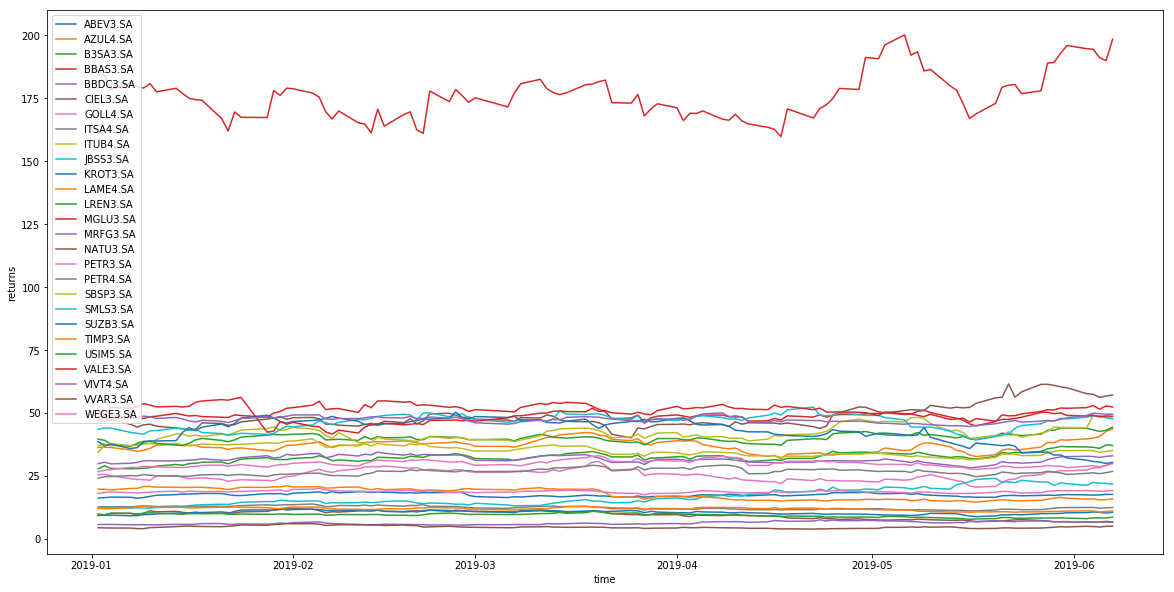

In [14]:
plt.plot(df)
plt.xlabel('time')
plt.ylabel('returns')
plt.legend(acoes)

In [16]:
# Calculando o retorno liquido simples

#retorno.dropna(inplace = True)
retorno = ((df/df.shift(1))-1)*100
retorno.head()

Attributes     Close                      ...                              
Symbols     ABEV3.SA  AZUL4.SA  B3SA3.SA  ...  VIVT4.SA  VVAR3.SA  WEGE3.SA
Date                                      ...                              
2019-01-02       NaN       NaN       NaN  ...       NaN       NaN       NaN
2019-01-03  1.114553  0.110094  4.354081  ...  0.890204 -1.598177  2.280311
2019-01-04  1.347210 -0.329939 -3.620687  ... -0.210081 -0.928073  1.141930
2019-01-07 -0.422959 -2.620692 -0.536678  ...  0.842108 -0.702581 -1.559145
2019-01-08 -2.002427 -1.643054  0.287770  ...  0.229638 -4.716977 -0.819222

[5 rows x 27 columns]

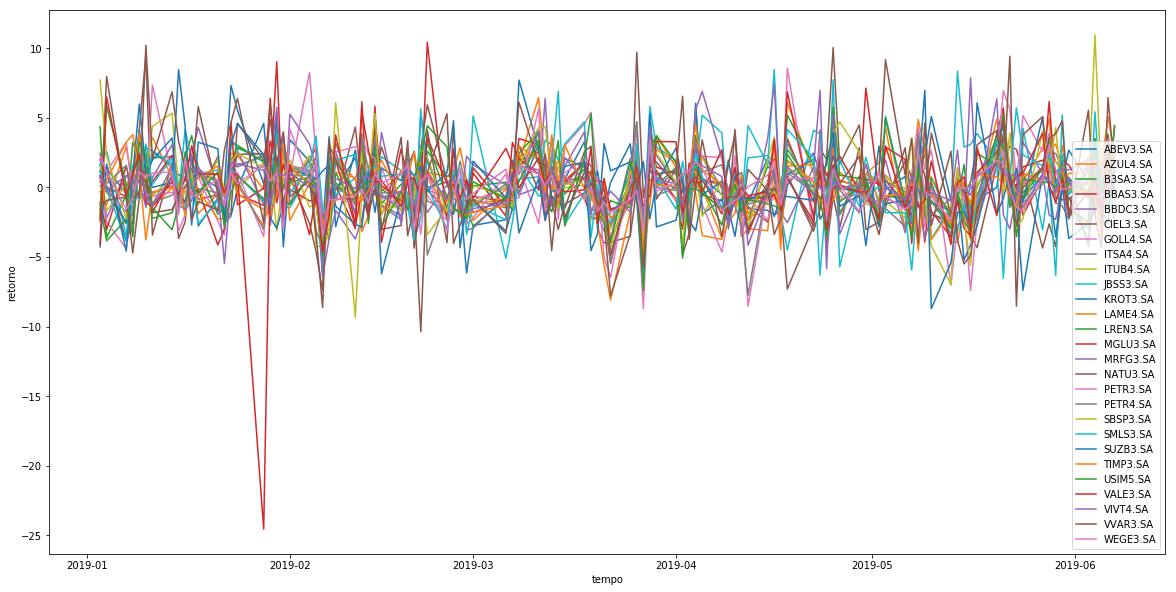

In [17]:
# Grafico o retorno liquido simples

plt.plot(retorno)
plt.xlabel('tempo')
plt.ylabel('retorno')
plt.legend(acoes)

In [19]:
# Calculando o log-retorno

#log_df.dropna(inplace = True)
log_df = np.log(df/df.shift(1))
log_df.head()

Attributes     Close                      ...                              
Symbols     ABEV3.SA  AZUL4.SA  B3SA3.SA  ...  VIVT4.SA  VVAR3.SA  WEGE3.SA
Date                                      ...                              
2019-01-02       NaN       NaN       NaN  ...       NaN       NaN       NaN
2019-01-03  0.011084  0.001100  0.042620  ...  0.008863 -0.016111  0.022547
2019-01-04  0.013382 -0.003305 -0.036879  ... -0.002103 -0.009324  0.011355
2019-01-07 -0.004239 -0.026556 -0.005381  ...  0.008386 -0.007051 -0.015714
2019-01-08 -0.020227 -0.016567  0.002874  ...  0.002294 -0.048319 -0.008226

[5 rows x 27 columns]

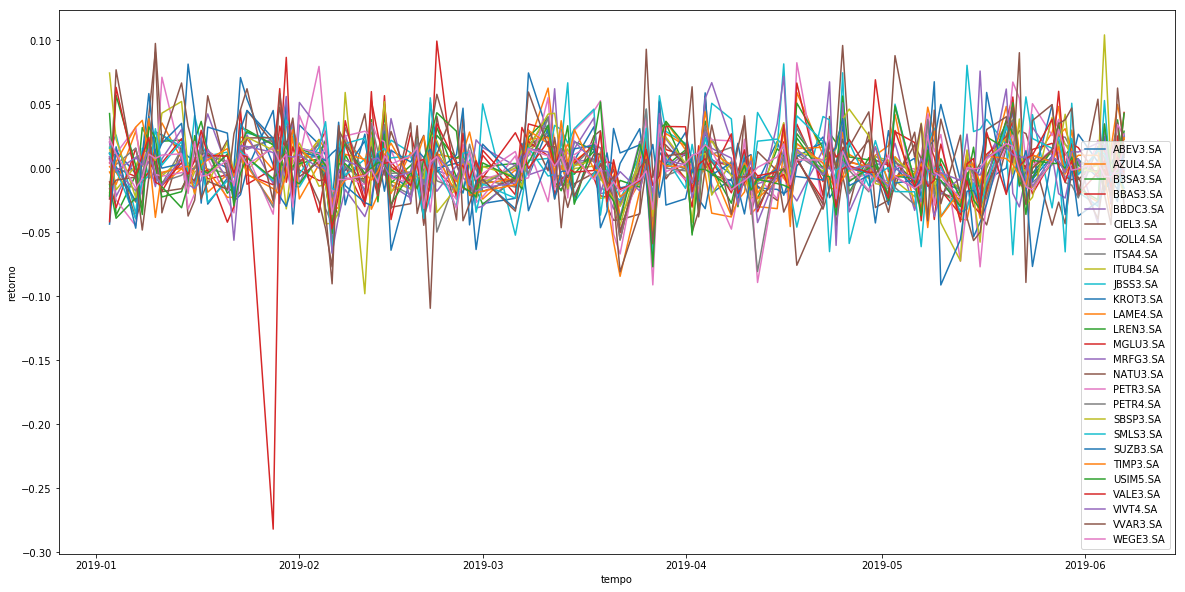

In [20]:
# Grafico Log-Retorno

plt.plot(log_df)
plt.xlabel('tempo')
plt.ylabel('retorno')
plt.legend(acoes)

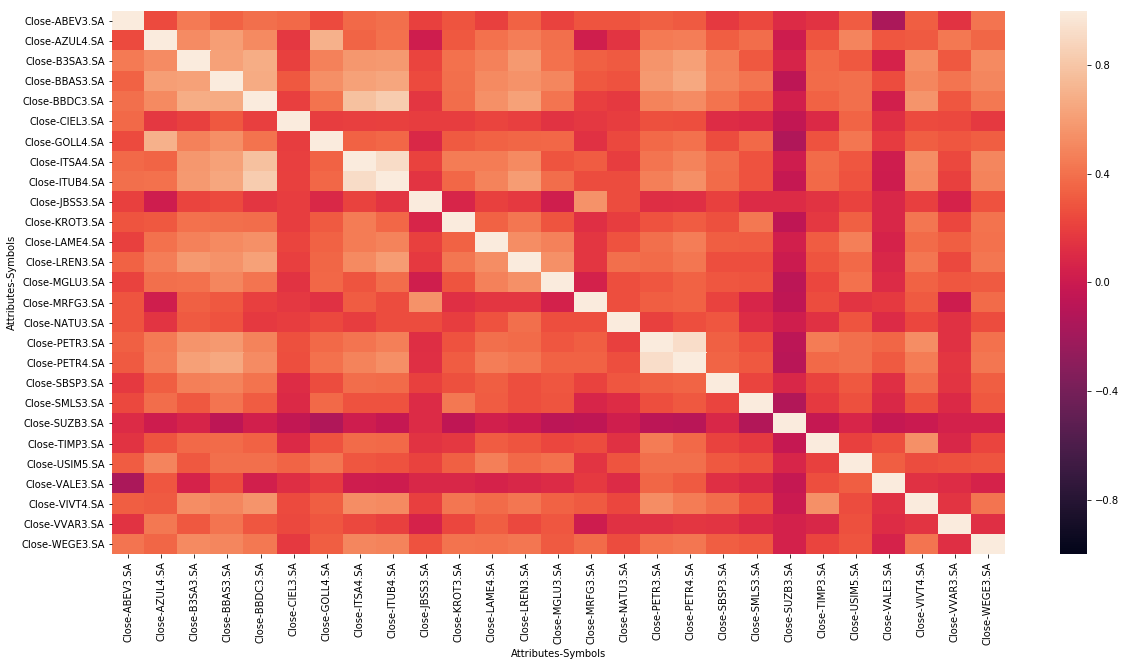

In [21]:
sns.heatmap(retorno.corr(), vmin=-1)

In [22]:
matriz_correlacao = retorno.corr()
print(matriz_correlacao)

Attributes              Close                      ...                              
Symbols              ABEV3.SA  AZUL4.SA  B3SA3.SA  ...  VIVT4.SA  VVAR3.SA  WEGE3.SA
Attributes Symbols                                 ...                              
Close      ABEV3.SA  1.000000  0.247993  0.444299  ...  0.322164  0.144481  0.416513
           AZUL4.SA  0.247993  1.000000  0.518003  ...  0.308096  0.430863  0.352671
           B3SA3.SA  0.444299  0.518003  1.000000  ...  0.523827  0.300711  0.511724
           BBAS3.SA  0.339824  0.606280  0.622170  ...  0.493624  0.414822  0.495975
           BBDC3.SA  0.394414  0.514141  0.676390  ...  0.556357  0.289231  0.434650
           CIEL3.SA  0.370375  0.166120  0.208693  ...  0.244640  0.236905  0.172455
           GOLL4.SA  0.246905  0.696164  0.472437  ...  0.324357  0.289850  0.323591
           ITSA4.SA  0.368317  0.348317  0.577315  ...  0.526129  0.240395  0.494888
           ITUB4.SA  0.392414  0.403020  0.578984  ...  0.513482 

In [0]:
#Contando o número de observacoes e numero de acoes
n = dados_acoes_original.count()
n_obs = n[1]

n_acoes = len(acoes)

##return_vec = np.random.randn(n_acoes, n_obs)

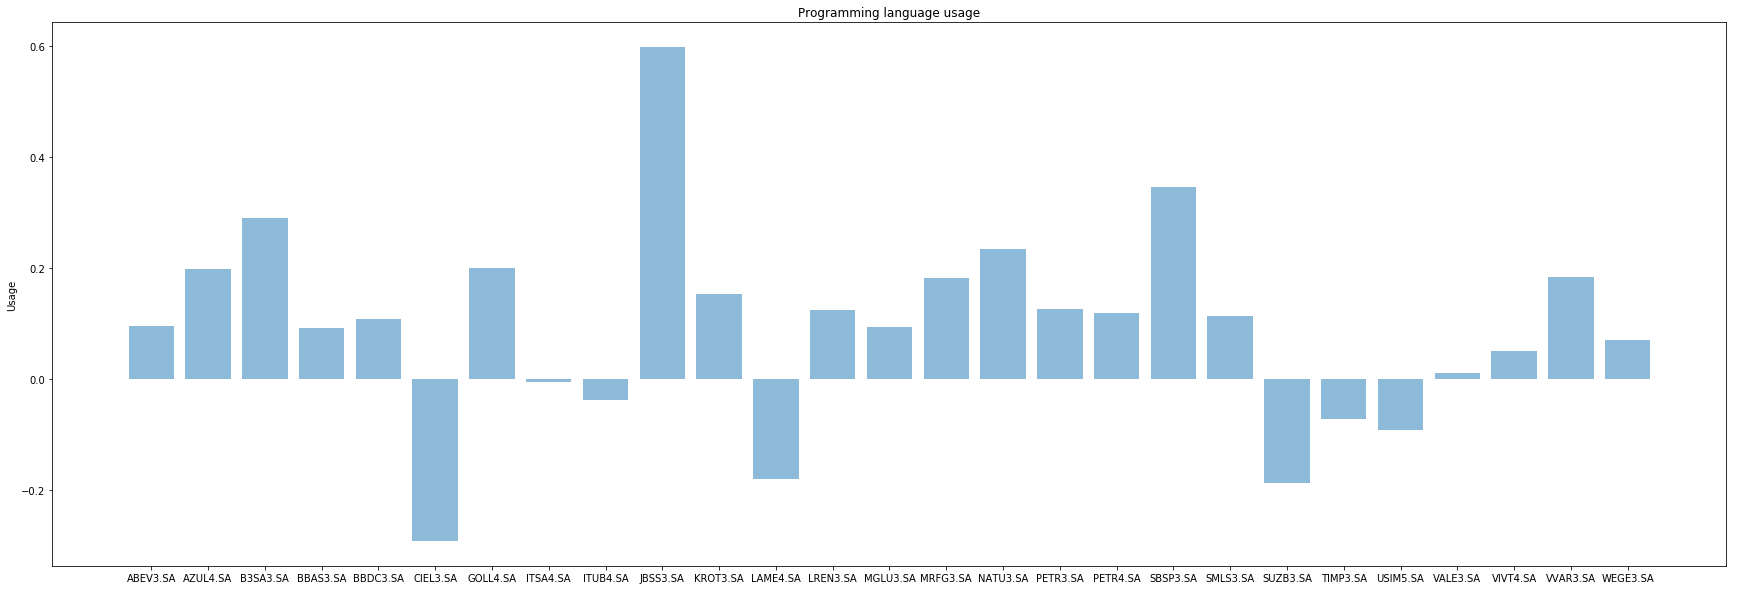

In [27]:
# Ajustando Tamanho do Grafico
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

y_pos = np.arange(len(acoes))

plt.bar(y_pos, retorno.mean(), align='center', alpha=0.5)
plt.xticks(y_pos, acoes)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()


In [0]:
k = np.random.rand(n_assets)aa
k/sum(k)

In [0]:
def pesos(n):
    k = np.random.rand(n)
    return (k/sum(k))

print (pesos(n_assets))
print (pesos(n_assets))
print (pesos(n_assets))
print (pesos(n_assets))

In [0]:
def random_portfolio(returns):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''

    p = np.asmatrix(np.mean(log_df, axis=1))
    w = np.asmatrix(rand_weights(log_df.shape[0]))
    C = np.asmatrix(np.cov(log_df))
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    
    # This recursion reduces outliers to keep plots pretty
    if sigma > 2:
        return random_portfolio(log_df)
    return mu, sigma

In [0]:
n_portfolios = 50000
means, stds = np.column_stack([
    random_portfolio(return_vec)
    for _ in range(n_portfolios)
    ])

In [0]:
plt.plot(stds, means, 'o', markersize=5)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')

In [0]:
def optimal_portfolio(returns):
    n = len(returns)
    returns = np.asmatrix(returns)
    
    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

pesos, retuns, risks = optimal_portfolio(return_vec)

plt.plot(stds, means, 'o')
plt.ylabel('mean')
plt.xlabel('std')
plt.plot(risks, returns, 'y-o')
